In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

from rapidgbm import RapidGBMTuner

import mplhep as hep
hep.style.use([hep.style.ATLAS])

import seaborn as sns

In [11]:
data = pd.read_parquet('/groups/hep/kinch/H_Zg/samples_processed/MC23/Zee_pairs_withtrigger.parquet')
data_zeederiv = pd.read_parquet('~/H_Zg/samples_processed/MC23/Zee_deriv_epairs_all_events.parquet')
print(data.columns)
print(len(data))

Index(['event_index', 'el1_index', 'el2_index', 'runNumber', 'eventNumber',
       'eventTrigger', 'actualInteractionsPerCrossing',
       'averageInteractionsPerCrossing', 'm_ee', 'isZ', 'el1_pt', 'el1_eta',
       'el1_phi', 'el1_m', 'el1_charge', 'el1_ptvarcone20', 'el1_topoetcone20',
       'el1_topoetcone40', 'el1_f1', 'el1_neflowisol20', 'el1_truthPdgId',
       'el1_truthType', 'el1_truthOrigin', 'el1_DFCommonElectronsECIDS',
       'el1_DFCommonElectronsECIDSResult', 'el1_DFCommonElectrons_pel',
       'el1_DFCommonElectrons_LHLoose', 'el1_GSFTrack_d0', 'el1_GSFTrack_z0',
       'el1_GSFTrack_theta', 'el1_GSFTrack_phi', 'el1_GSFTrack_qOverP',
       'el1_GSF_dR', 'el1_GSF_Track_Var0', 'el1_GSF_Track_Var1',
       'el1_GSF_Track_Var2', 'el1_GSF_Track_Var3', 'el1_GSF_Track_Var4',
       'el2_pt', 'el2_eta', 'el2_phi', 'el2_m', 'el2_charge',
       'el2_ptvarcone20', 'el2_topoetcone20', 'el2_topoetcone40', 'el2_f1',
       'el2_neflowisol20', 'el2_truthPdgId', 'el2_truthType',
   

In [13]:
print(len(data_zeederiv[data_zeederiv['isZ'] == 1]))
print(len(data[data['isZ'] == 1]))

122514
116460


116460
no


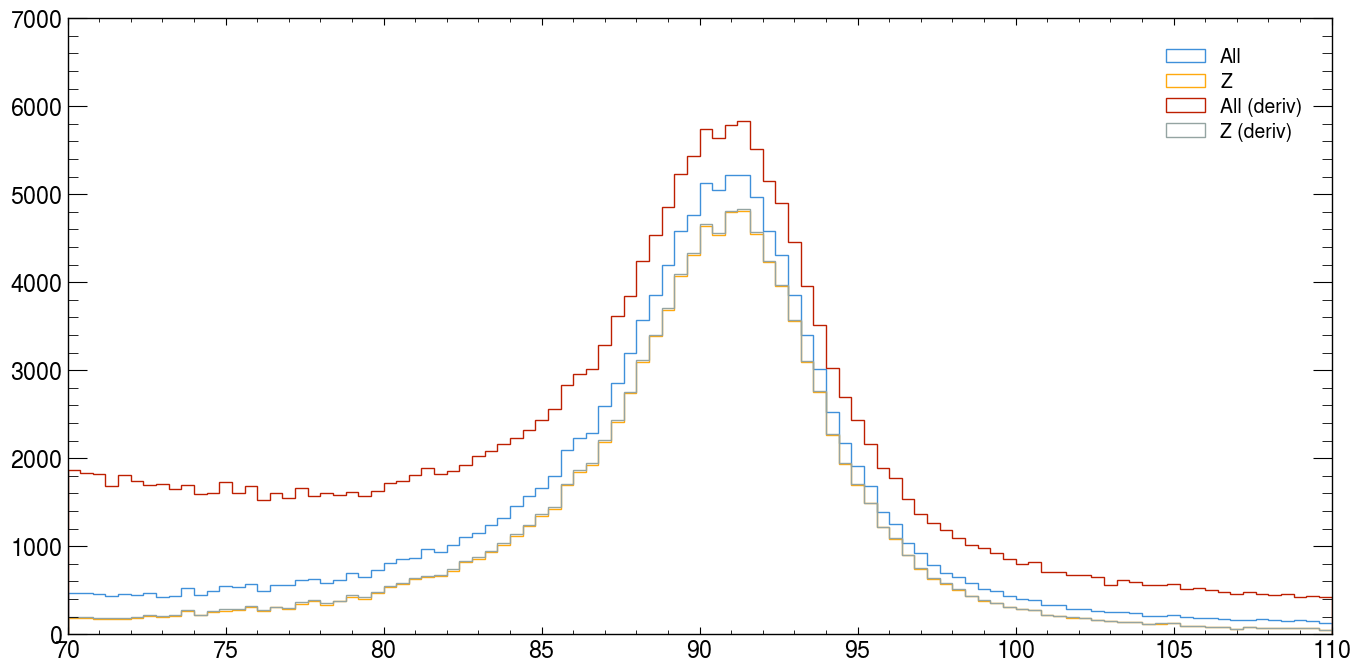

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data['m_ee'], bins=100, range=(70, 110), histtype='step', label='All')
ax.hist(data['m_ee'][data['isZ'] == 1], bins=100, range=(70, 110), histtype='step', label='Z')

ax.hist(data_zeederiv['m_ee'], bins=100, range=(70, 110), histtype='step', label='All (deriv)')
ax.hist(data_zeederiv['m_ee'][data_zeederiv['isZ'] == 1], bins=100, range=(70, 110), histtype='step', label='Z (deriv)')

print(len(data[data['isZ'] == 1]))
ax.legend()
print('no')

3172
no


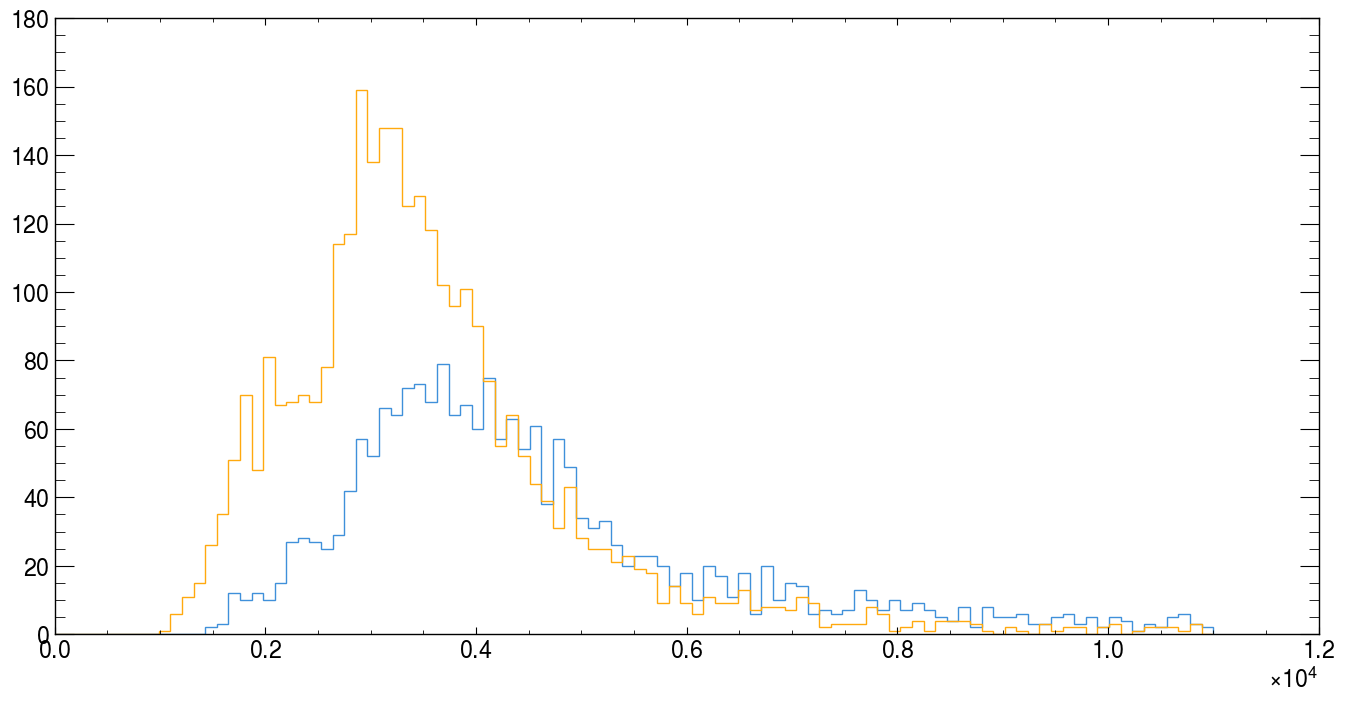

In [24]:
# list of event z-events that are not in the data datafile:

indexes_data = (data['event_index'][data['isZ'] == 1].to_numpy())
indexes_data_zeederiv = (data_zeederiv['event_index'][data_zeederiv['isZ'] == 1].to_numpy())

# get list of indexes that are in the data_zeederiv but not in the data
indexes_diff = np.setdiff1d(indexes_data_zeederiv, indexes_data)
print(len(indexes_diff))

fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(data_zeederiv['el1_pt'][indexes_diff],range=(0,11000), bins=100, histtype='step', label='Z (deriv) not in data')
ax.hist(data_zeederiv['el2_pt'][indexes_diff],range=(0,11000), bins=100, histtype='step', label='Z (deriv) not in data')
print('no')